# DATA LOAD

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
#from tensorflow import set_random_seed

from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

In [14]:
data_dir = '2nd_test'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)

merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']

2004.02.12.10.32.39
2004.02.12.10.42.39
2004.02.12.10.52.39
2004.02.12.11.02.39
2004.02.12.11.12.39
2004.02.12.11.22.39
2004.02.12.11.32.39
2004.02.12.11.42.39
2004.02.12.11.52.39
2004.02.12.12.02.39
2004.02.12.12.12.39
2004.02.12.12.22.39
2004.02.12.12.32.39
2004.02.12.12.42.39
2004.02.12.12.52.39
2004.02.12.13.02.39
2004.02.12.13.12.39
2004.02.12.13.22.39
2004.02.12.13.32.39
2004.02.12.13.42.39
2004.02.12.13.52.39
2004.02.12.14.02.39
2004.02.12.14.12.39
2004.02.12.14.22.39
2004.02.12.14.32.39
2004.02.12.14.42.39
2004.02.12.14.52.39
2004.02.12.15.02.39
2004.02.12.15.12.39
2004.02.12.15.22.39
2004.02.12.15.32.39
2004.02.12.15.42.39
2004.02.12.15.52.39
2004.02.12.16.02.39
2004.02.12.16.12.39
2004.02.12.16.22.39
2004.02.12.16.32.39
2004.02.12.16.42.39
2004.02.12.16.52.39
2004.02.12.17.02.39
2004.02.12.17.12.39
2004.02.12.17.22.39
2004.02.12.17.32.39
2004.02.12.17.42.39
2004.02.12.17.52.39
2004.02.12.18.02.39
2004.02.12.18.12.39
2004.02.12.18.22.39
2004.02.12.18.32.39
2004.02.12.18.42.39


2004.02.15.09.32.39
2004.02.15.09.42.39
2004.02.15.09.52.39
2004.02.15.10.02.39
2004.02.15.10.12.39
2004.02.15.10.22.39
2004.02.15.10.32.39
2004.02.15.10.42.39
2004.02.15.10.52.39
2004.02.15.11.02.39
2004.02.15.11.12.39
2004.02.15.11.22.39
2004.02.15.11.32.39
2004.02.15.11.42.39
2004.02.15.11.52.39
2004.02.15.12.02.39
2004.02.15.12.12.39
2004.02.15.12.22.39
2004.02.15.12.32.39
2004.02.15.12.42.39
2004.02.15.12.52.39
2004.02.15.13.02.39
2004.02.15.13.12.39
2004.02.15.13.22.39
2004.02.15.13.32.39
2004.02.15.13.42.39
2004.02.15.13.52.39
2004.02.15.14.02.39
2004.02.15.14.12.39
2004.02.15.14.22.39
2004.02.15.14.32.39
2004.02.15.14.42.39
2004.02.15.14.52.39
2004.02.15.15.02.39
2004.02.15.15.12.39
2004.02.15.15.22.39
2004.02.15.15.32.39
2004.02.15.15.42.39
2004.02.15.15.52.39
2004.02.15.16.02.39
2004.02.15.16.12.39
2004.02.15.16.22.39
2004.02.15.16.32.39
2004.02.15.16.42.39
2004.02.15.16.52.39
2004.02.15.17.02.39
2004.02.15.17.12.39
2004.02.15.17.22.39
2004.02.15.17.32.39
2004.02.15.17.42.39


2004.02.18.07.22.39
2004.02.18.07.32.39
2004.02.18.07.42.39
2004.02.18.07.52.39
2004.02.18.08.02.39
2004.02.18.08.12.39
2004.02.18.08.22.39
2004.02.18.08.32.39
2004.02.18.08.42.39
2004.02.18.08.52.39
2004.02.18.09.02.39
2004.02.18.09.12.39
2004.02.18.09.22.39
2004.02.18.09.32.39
2004.02.18.09.42.39
2004.02.18.09.52.39
2004.02.18.10.02.39
2004.02.18.10.12.39
2004.02.18.10.22.39
2004.02.18.10.32.39
2004.02.18.10.42.39
2004.02.18.10.52.39
2004.02.18.11.02.39
2004.02.18.11.12.39
2004.02.18.11.22.39
2004.02.18.11.32.39
2004.02.18.11.42.39
2004.02.18.11.52.39
2004.02.18.12.02.39
2004.02.18.12.12.39
2004.02.18.12.22.39
2004.02.18.12.32.39
2004.02.18.12.42.39
2004.02.18.12.52.39
2004.02.18.13.02.39
2004.02.18.13.12.39
2004.02.18.13.22.39
2004.02.18.13.32.39
2004.02.18.13.42.39
2004.02.18.13.52.39
2004.02.18.14.02.39
2004.02.18.14.12.39
2004.02.18.14.22.39
2004.02.18.14.32.39
2004.02.18.14.42.39
2004.02.18.14.52.39
2004.02.18.15.02.39
2004.02.18.15.12.39
2004.02.18.15.22.39
2004.02.18.15.32.39


In [15]:
merged_data

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004.02.12.10.32.39,0.058333,0.071832,0.083242,0.043067
2004.02.12.10.42.39,0.058995,0.074006,0.084435,0.044541
2004.02.12.10.52.39,0.060236,0.074227,0.083926,0.044443
2004.02.12.11.02.39,0.061455,0.073844,0.084457,0.045081
2004.02.12.11.12.39,0.061361,0.075609,0.082837,0.045118
...,...,...,...,...
2004.02.19.05.42.39,0.453335,0.161016,0.137440,0.119047
2004.02.19.05.52.39,0.337583,0.132400,0.144992,0.092125
2004.02.19.06.02.39,0.351111,0.152266,0.151299,0.100817
2004.02.19.06.12.39,0.001857,0.003732,0.003656,0.001786


In [16]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('merged_dataset_BearingTest_2.csv')
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


# PRE PROCESSING
- 정상만 있는 구간을 TRAIN 이후 5일 정도를 TEST로 나눔

<AxesSubplot:>

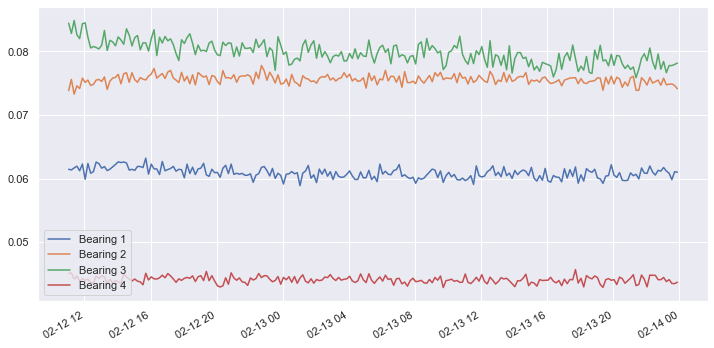

In [17]:
dataset_train = merged_data['2004-02-12 11:02:39':'2004-02-13 23:52:39']
dataset_test = merged_data['2004-02-13 23:52:39':]
dataset_train.plot(figsize = (12,6))

<AxesSubplot:>

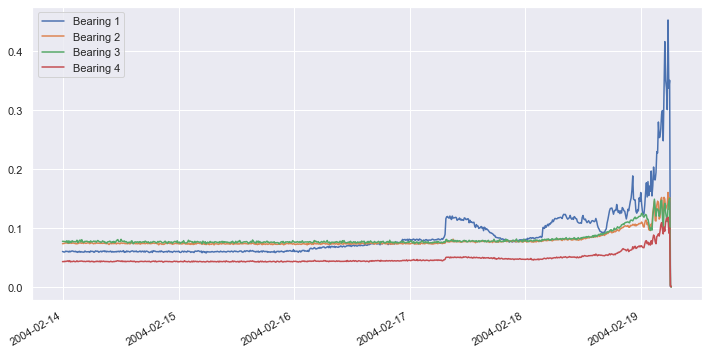

In [18]:
dataset_test.plot(figsize = (12,6))

+ MIN-MAX SCALER

In [19]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

<AxesSubplot:>

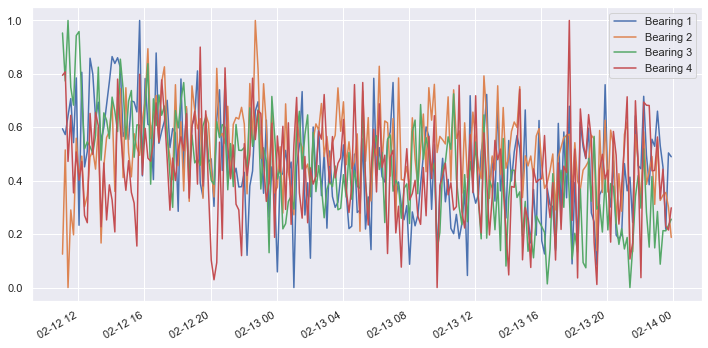

In [21]:
X_train.plot(figsize = (12,6))

<AxesSubplot:>

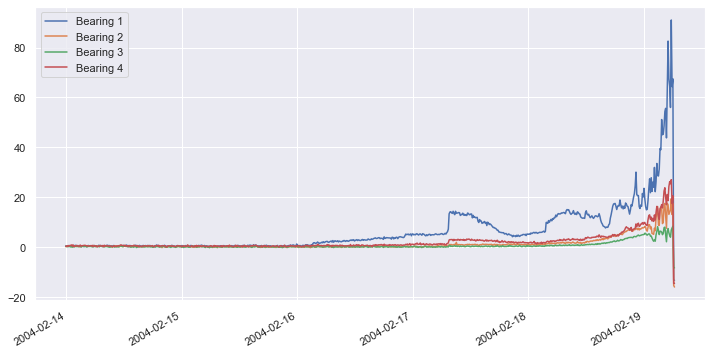

In [22]:
X_test.plot(figsize = (12,6))

# Wavelet
## DWT - 노이즈 자동 제거 효과
+ 방법이 너무 많음
+ 어떤 것을 사용해야 할지에 대한 고민 필요 혹은 조합 방법 
+ -> 모델 생성 후 실험적으로 접근 VS 데이터의 특성 파악해서 선택
+ cA (approximation)는 저주파만 남김, cD(detail)은 고주파만 남겼다고 볼 수 있음
+ "dbn"의 n에 따라 남겨지는 정도가 다르다. 

In [100]:
#dwt 함수 종류
import pywt
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [105]:
select_function = 'coif2'
cA, cD = pywt.dwt(merged_data['Bearing 1'], select_function)

In [106]:
print("변환 전 길이:",len(merged_data['Bearing 1']))
print("wavelet 변환 후 길이:",len(cA))

변환 전 길이: 984
wavelet 변환 후 길이: 497


<AxesSubplot:>

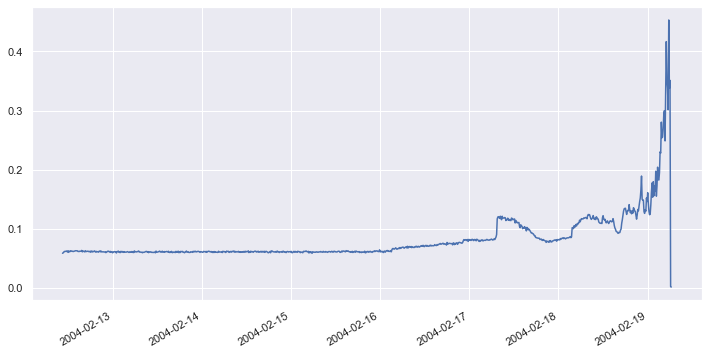

In [107]:
pd.Series(merged_data['Bearing 1']).plot(figsize = (12,6))

<AxesSubplot:>

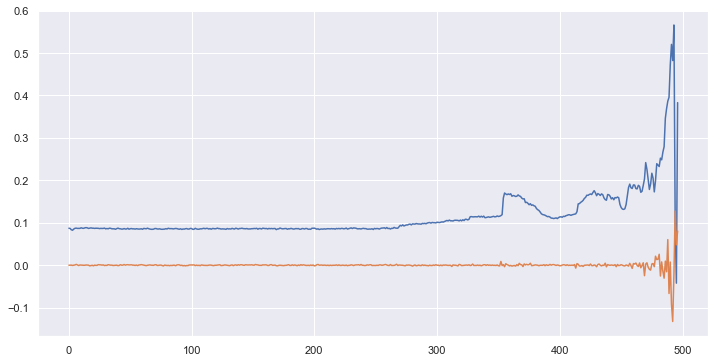

In [108]:
#merged_data['Bearing 1'].plot(figsize = (12,6))
pd.Series(cA).plot(figsize = (12,6))#lowpass
pd.Series(cD).plot(figsize = (12,6)) #highpass

### CWT (스펙트로그램 생성)
+ scipy를 통한 low, high를 통해 주파수 필터를 따로 생성
+ a scale factor, b shift facotr를 통해 다양한 스펙트로그램 생성 가능

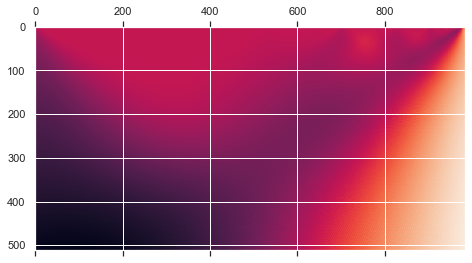

In [111]:
# 스펙트로그램에서는 시간축과 주파수 축의 변화에 따라 
#진폭의 차이를 인쇄 농도 / 표시 색상의 차이로 나타낸다.

>>> x = np.arange(512)
>>> y = np.sin(2*np.pi*x/32)
>>> coef, freqs=pywt.cwt(merged_data['Bearing 1'],np.arange(1,512),'gaus1')
>>> plt.matshow(coef) # doctest: +SKIP
>>> plt.show() # doctest: +SKIP

<AxesSubplot:>

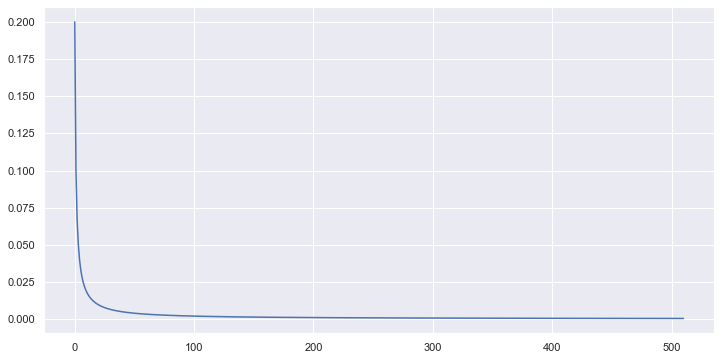

In [112]:
pd.Series(freqs).plot(figsize = (12,6))

In [72]:
coef.shape

(128, 984)